In [68]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def process_iv_pair(suffix, base_path, tol=0.01e-6):

    def linear_function(x, a, b):
        return a * x + b

    # Construct file paths
    file_std = os.path.join(base_path, f"IV_pads_S{suffix}.txt")
    file_after = os.path.join(base_path, f"IV_pads_S{suffix}_afterVoltage.txt")

    # Load data
    df1 = pd.read_csv(file_std, sep=r"\s+")
    df2 = pd.read_csv(file_after, sep=r"\s+")

    # Filter and fit standard
    mask1 = ~np.isclose(df1["AI"], -1e-6, atol=tol) & ~np.isclose(df1["AI"], 1e-6, atol=tol)
    x1, y1 = df1["AV"][mask1].values, df1["AI"][mask1].values
    a1, b1 = curve_fit(linear_function, x1, y1)[0]
    x_fit1 = np.linspace(min(x1), max(x1)*1.25, 300)
    y_fit1 = linear_function(x_fit1, a1, b1)

    # Filter and fit afterVoltage
    mask2 = ~np.isclose(df2["AI"], -1e-6, atol=tol) & ~np.isclose(df2["AI"], 1e-6, atol=tol)
    x2, y2 = df2["AV"][mask2].values, df2["AI"][mask2].values
    a2, b2 = curve_fit(linear_function, x2, y2)[0]
    x_fit2 = np.linspace(min(x2), max(x2)*1.25, 300)
    y_fit2 = linear_function(x_fit2, a2, b2)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(df1["AV"], df1["AI"], color='royalblue', linewidth=2, marker='o', markersize=5, label='I(V) standard')
    plt.plot(df2["AV"], df2["AI"], color='tomato', linewidth=5, marker='o', markersize=2, label='I(V) after Voltage', alpha=0.7)
    plt.plot(x_fit1, y_fit1, color='deepskyblue', linestyle='--', linewidth=2,
             label=f'Fit Before: I = {a1:.2e}·V + {b1:.2e}', alpha=0.4)
    plt.plot(x_fit2, y_fit2, color='orange', linestyle='--', linewidth=2,
             label=f'Fit After: I = {a2:.2e}·V + {b2:.2e}', alpha=0.7)

    plt.grid(True, linestyle='--', alpha=0.4)
    plt.xlabel("Voltage (V)")
    plt.ylabel("Current (A)")
    plt.title(f"IV Characteristic of S{suffix}", fontsize=14)
    plt.legend()
    plt.tight_layout()

    # Save plot
    plot_filename = os.path.join(base_path, f"IVS_{suffix}.png")
    plt.savefig(plot_filename, dpi=300)
    #plt.close()

    # Print result
    print(f"[S{suffix}] Slope ratio (after/before): {a2/a1:.2f}")

[S07] Slope ratio (after/before): 3.11
[S17] Slope ratio (after/before): 1.00
[S27] Slope ratio (after/before): 1.00
[S37] Slope ratio (after/before): 1.00
[S47] Slope ratio (after/before): 1.00
[S57] Slope ratio (after/before): 1.00
[S67] Slope ratio (after/before): 1.00
[S77] Slope ratio (after/before): 1.00
[S87] Slope ratio (after/before): 1.00
[S97] Slope ratio (after/before): 1.00


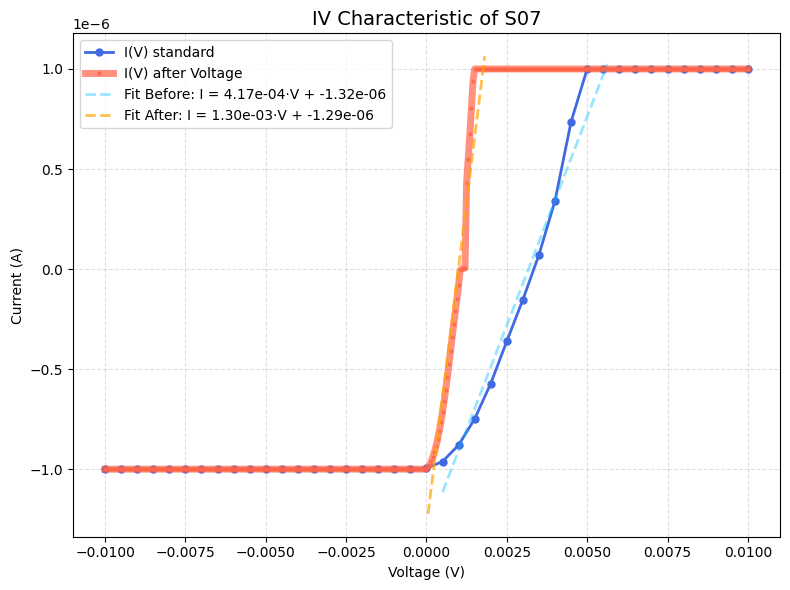

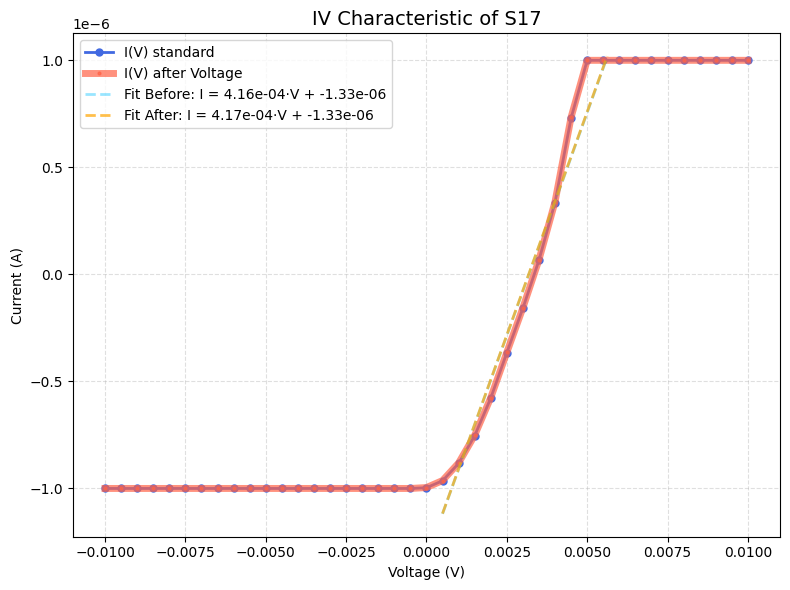

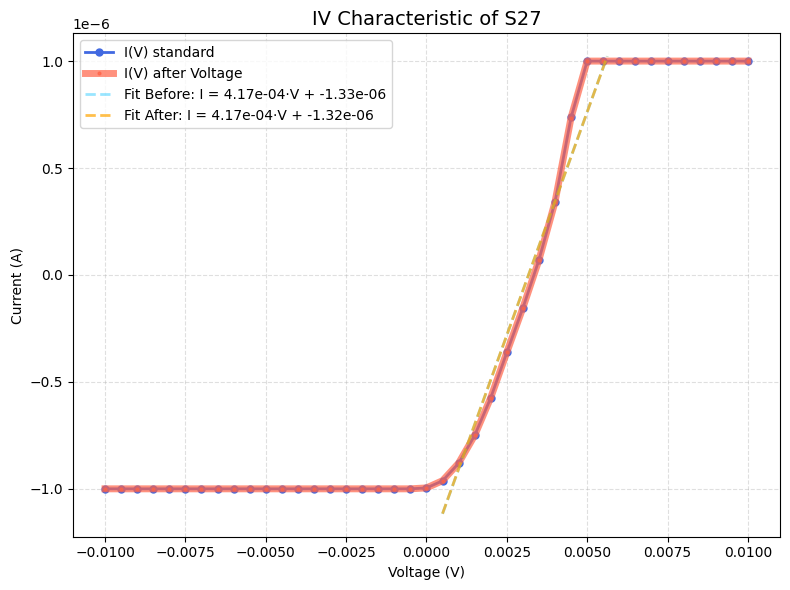

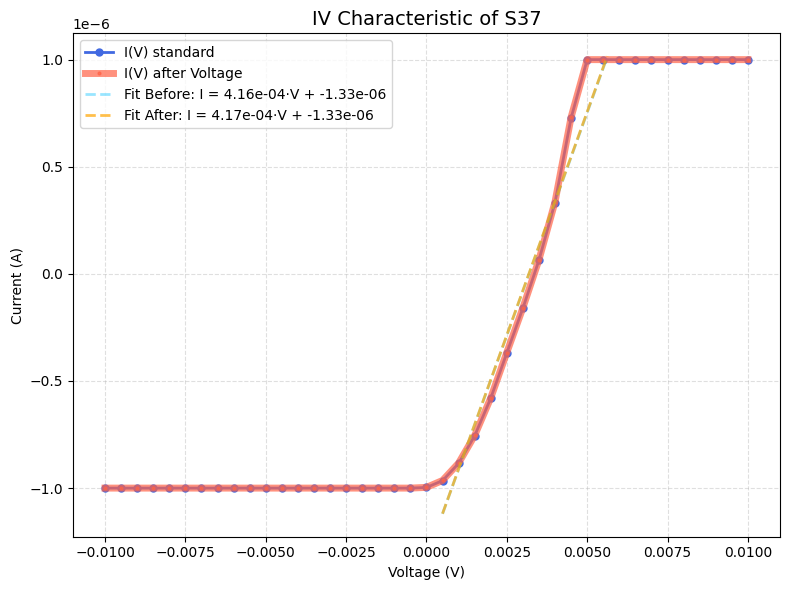

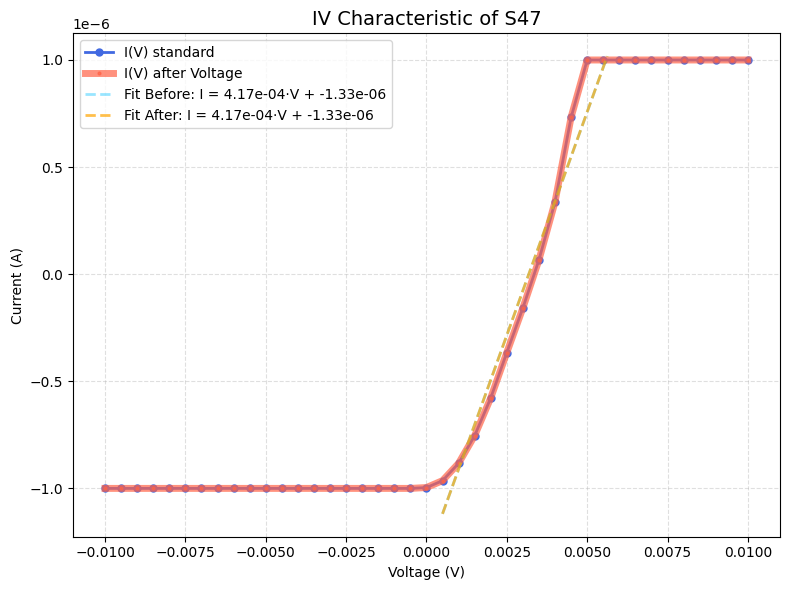

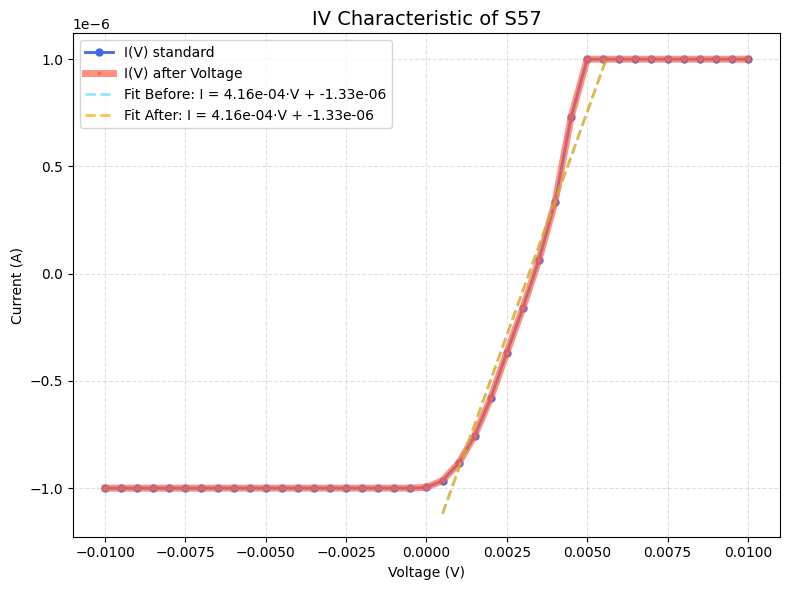

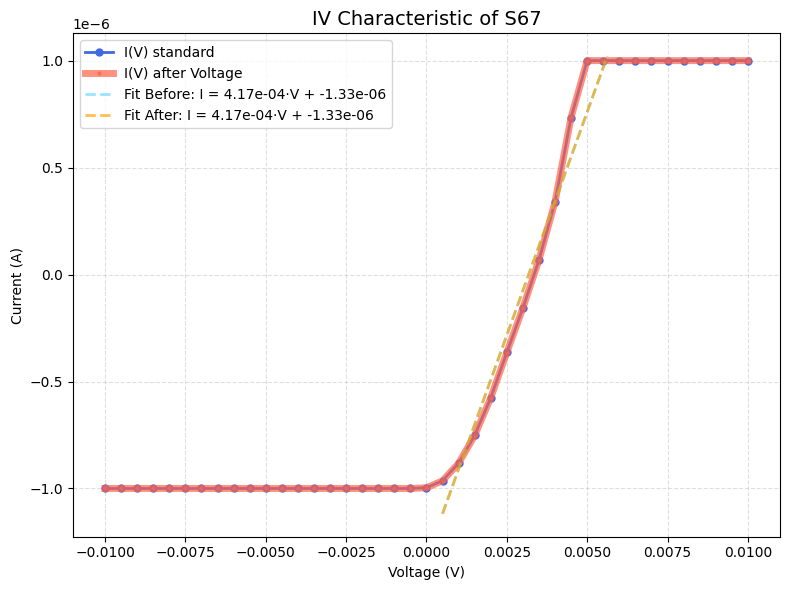

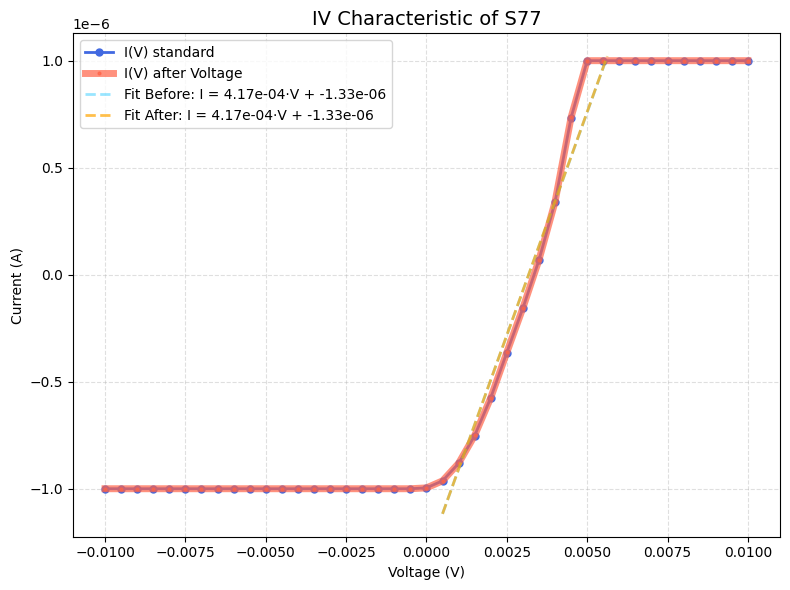

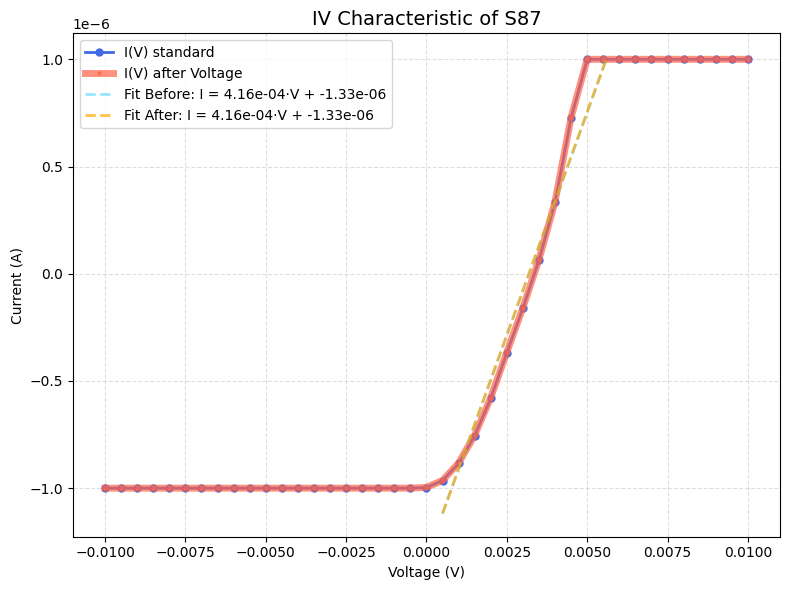

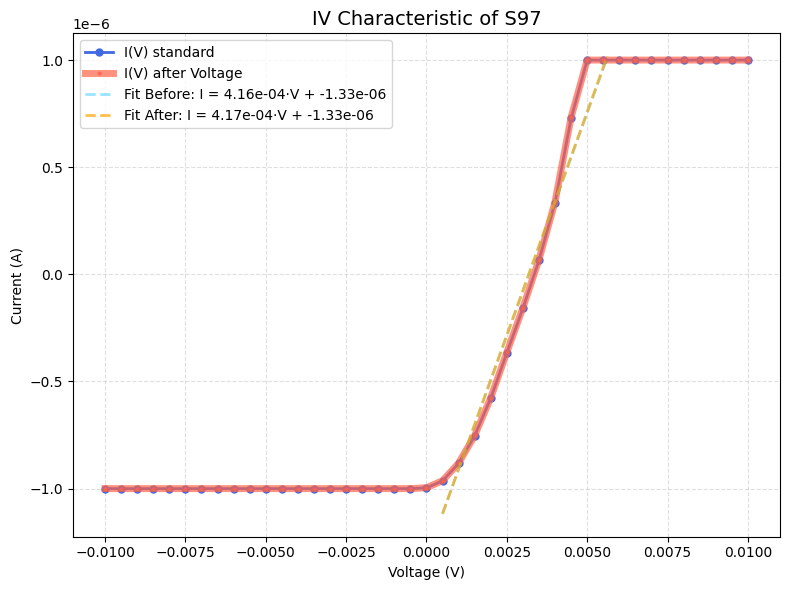

In [69]:
pads_array=["07", "17", "27", "37", "47", "57", "67", "77", "87", "97"]
for pad in pads_array:
    process_iv_pair(pad, base_path=r"C:\Users\andri\Desktop\Universitaet\Mikroelektronik Labor\SiN_Test\LabMikroelectronicsCascade")